**Cadastrar acesso a API do Twitter**

https://developer.twitter.com/en/apps

In [1]:
#Você precisa configurar um aplicativo no Twitter Apps. Depois disso, crie quatro variáveis que armazenarão sua chave e segredo do consumidor e seus tokens
CONSUMER_KEY = '88PbLPd9PfFpayHSYXWvDVzsN'
CONSUMER_SECRET = 'W2G4L7AYtxg6TYsVU6INkooP5V2gZzEAZorWMbzfZUsQax6hFN'

ACCESS_TOKEN = '201376809-LWKPVmRq56RezaycC6Tsefo9Di6fO0UTot1ri4Bj'
ACCESS_SECRET = 'F7FPmggTyT2jsrOXUQL4MG3vdS7TmegPu2tqRGGHmynLr'

O motivo para criar esse arquivo extra é que só queremos exportar o valor dessas variáveis e fazer com que não sejam vistas no código principal. Agora vamos dar início ao nosso script principal. Começando pela importação das bibliotecas que serão usadas:

In [2]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib as plt
import seaborn as sns
import textblob
from IPython.display import display
from textblob import TextBlob
import re

Agora vamos criar uma função que servirá como meio de autenticação dos nossos dados pela API do twitter. Basicamente, vamos usar as funções OAuthHandle e set_access_token (ambas da biblioteca tweepy).

In [3]:
# Autenticação e acesso através de chaves:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
# Retorna a api autenticada:
api = tweepy.API(auth)

Chegamos no momento de escolher o tema para a análise. Infelizmente as bibliotecas usadas nesse tutorial não conseguem trabalhar com o idioma português e,então, precisei escolher um assunto internacional para trabalharmos aqui. E eu escolhi uma das personalidades mais em pauta nos últimos tempos!



In [4]:
termo_pesquisa = 'donald trump'

In [8]:
# extração dos tweets
extractor = api
# Criação de uma listas dos 200 (não consegui pegar mais do que isso) últimos tweets do #Bolsonaro. Cada elemento da lista é do tipo tweet, do Tweepy.
# tweets = extractor.user_timeline(screen_name="Bolsonaro", count=200)
tweets = api.search(termo_pesquisa)
print("Número de tweets extraidos: {}.\n".format(len(tweets)))
# Printando no Console IPython os primeiros 5 registros:
print("5 tweets:\n")
for tweet in tweets[:10]:
  print(tweet.text)

Número de tweets extraidos: 15.

5 tweets:

RT @RpsAgainstTrump: “If I have to choose between maintaining a seat in the House of Representatives or protecting the constitutional repub…
RT @AdamParkhomenko: Don’t let anyone ever tell you Ron DeSantis isn’t as dangerous as Donald Trump. If anything he seems to be even more c…
RT @OccupyDemocrats: BREAKING: Donald Trump, who is morbidly obese, posts an unflattering photo on Truth Social of Republican Chris Christi…
RT @RexChapman: Donald Trump’s entire campaign was centered on fear of illegal immigrants. For two years the GOP had the White House and Co…
RT @an_gay_man: Sometimes I forget that Donald Trump is actually a real person and not just some ethereal deity made up to haunt the minds…
RT @fake_biden: I want to congratulate Donald trump on getting away with everything. Well done. It’s not easy to be an arch criminal withou…
RT @OccupyDemocrats: BREAKING: Huge Donald Trump bombshell drops as it's revealed that months before hundreds o

Para manipularmos os dados com maior liberdade e agilidade, vamos transformar a lista criada em um dataframe e na linha seguinte, printar os 10 primeiros registros do dataframe criado:

In [11]:
print(type(tweets))

<class 'tweepy.models.SearchResults'>


In [10]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,RT @RpsAgainstTrump: “If I have to choose betw...
1,RT @AdamParkhomenko: Don’t let anyone ever tel...
2,"RT @OccupyDemocrats: BREAKING: Donald Trump, w..."
3,RT @RexChapman: Donald Trump’s entire campaign...
4,RT @an_gay_man: Sometimes I forget that Donald...
5,RT @fake_biden: I want to congratulate Donald ...
6,RT @OccupyDemocrats: BREAKING: Huge Donald Tru...
7,RT @nytimes: Northern California's Shasta Coun...
8,RT @RpsAgainstTrump: “If I have to choose betw...
9,"RT @OccupyDemocrats: BREAKING: Donald Trump, w..."


In [26]:
data.head(1)

,Tweets
0,RT @TimHannan: Does Donald Trump really think ...


Para visualizar o data frame todo, basta ir na janela Explorador de Variáveis no Syper. Uma coisa interessante é a quantidade de dados presentes em um único tweet, como data da criação, fonte e outras. Podemos acessar essas informações através de outras funções da biblioteca Tweepy:

In [13]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1571128581186785286
2022-09-17 13:26:58
Twitter for iPhone
0
584
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RpsAgainstTrump', 'name': 'Republicans against Trumpism', 'id': 1221462414744596483, 'id_str': '1221462414744596483', 'indices': [3, 19]}], 'urls': []}


Agora vamos adicionar ainda mais dados no nosso dataframe. Para isso, vamos fazer uso da técnica chamada List Comprhension do Python e, com isso, vamos criar mais colunas no data frame.

In [ ]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

**Análises básicas**
Nessa próxima parte do código, vamos fazer algumas análises estatísticas básicas nos dados. Primeiramente vamos achar a média do tamanho dos tweets do presidente:

In [ ]:
mean = np.mean(data['len'])
print("A média do comprimento em tweets: {}".format(mean))

A média do comprimento em tweets: 134.26666666666668


Descobrimos que, em média, o Trump usa em média 120 caracteres. Agora para descobrir qual foi o tweet com maior número de likes e retweets vamos usar a maravilhosa biblioteca pandas.

In [ ]:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

In [50]:
# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(data['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

O tweet com mais curtidas é: 
RT @TimHannan: Does Donald Trump really think he can threaten his way out of an indictment? If anything the threats emphasize the need to h…
Número de curtidas: 0
140 characters.



In [51]:
# Max RTs:
print("O tweet com mais retuítes é: \n{}".format(data['Tweets'][rt]))
print("Número de retuítes: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

O tweet com mais retuítes é: 
RT @OccupyDemocrats: BREAKING: Donald Trump claims that he “can’t imagine being indicted” for his many crimes and claims he’s “don’t nothin…
Número de retuítes: 12540
140 characters.



Agora vamos plotar séries temporais (são basicamente dados coletados sequencialmente em um intervalo de tempo). As séries temporais serão criadas pela função values, graças ao tipo DateTime que possuem, da biblioteca Numpy e vamos plotar as séries criadas usando a função plot, da biblioteca MatplotLib.

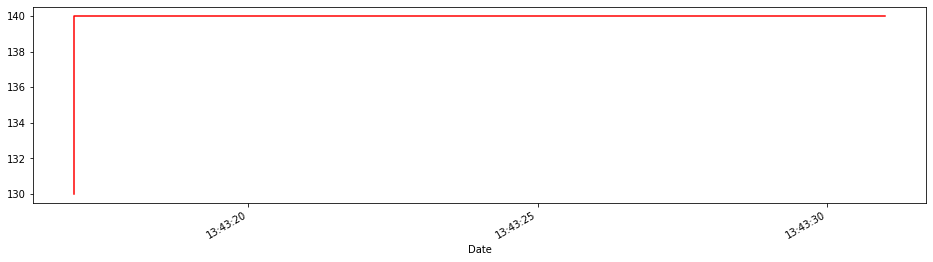

In [53]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# grafico do tamanho dos tweets ao longo do tempo.
tlen.plot(figsize=(16,4), color='r');

Agora vamos plotar um gráfico para analisar a quantidade de likes versus de retweets. Faremos uso da função plot mais uma vez.

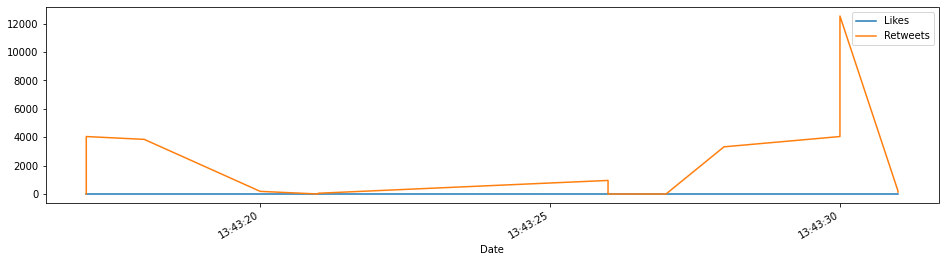

In [59]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

E agora vamos para a análise de sentimentos propriamente ditas. Para isso, precisamos “limpar” nossos dados, ou seja, deixar eles de uma maneira que a algoritmo possa entender. Vamos eliminar qualquer caracter que não seja alfanumérico:

In [60]:
def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

Uma vez criada a função de limpeza. Vamos criar agora a função que irá classificar se o tweet teve “humor” positivo, negativo ou neutro. Para isso, vamos usar as funções da biblioteca TextBlob.

Essa biblioteca classifica a polaridade de um tweet mas basicamente ela trabalha com diversos modelos de Machine Learning usados para processamento de linguagem natural.

In [61]:
def analize_sentiment(tweet):
  analysis = TextBlob(clean_tweet(tweet))
  if analysis.sentiment.polarity > 0:
    return 1
  elif analysis.sentiment.polarity == 0:
    return 0
  else:
    return -1

Agora vamos adicionar ao nosso dataframe uma coluna extra, contendo a classificação de cada tweet (-1 para negativo, 0 para neutro e 1 para positivo).

In [62]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

Com isso nós temos o resultado da análise de sentimento de cada tweet do Bolsonaro. Para ter uma visualização melhor, vamos contar a quantidade de registro em cada polaridade e printar:

In [63]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [64]:
# Printando as porcentagens:
print("Porcentagem de tweets positivos: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentagem de tweets neutros: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentagem de tweets negaticos: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Porcentagem de tweets positivos: 33.333333333333336%
Percentagem de tweets neutros: 0.0%
Percentagem de tweets negaticos: 66.66666666666667%


Vamos criar uma variável que irá armazenar tweets com a palavra Bolsonaro e criar uma outra variável onde ficará armazenado o resultado da análise de sentimento:

In [65]:
#Variável que irá armazenar todos os Tweets com a palavra escolhida na função search da API
public_tweets = api.search(termo_pesquisa)
#Variável que irá armazenar as polaridades
analysis = None

Agora vamos fazer um laço for para percorrer cada registro da variável public_tweets e calcular a polaridade de todos:

In [68]:
for tweet in public_tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment.polarity)

RT @DashDobrofsky: Donald Trump’s arrest will have a very calming effect on the nation. Everyday Americans deserve to know that the rule of…
-0.016666666666666663
RT @shannonrwatts: New analysis shows Donald Trump is overtly encouraging his base to embrace QAnon and related violence; experts say that’…
-0.22121212121212122
RT @MSNBC: Biden job growth outpaces any individual year from Donald Trump’s term. Republicans are going out of their way to pretend not to…
0.0
RT @MSNBC: Biden job growth outpaces any individual year from Donald Trump’s term. Republicans are going out of their way to pretend not to…
0.0
RT @trump_123456: トランプさんは女王の葬儀には招待されず、代わりにワシントンDCでの追悼式に他の存命の元アメリカ大統領と共に出席する予定！

トランプが他の3人の反逆の戦犯の隣に座って、封筒をまた渡すのかな?🍿

https://t.co/utrfNROqtY…
0.0
RT @realKyleKeegan: Why does Donald Trump hate America?
-0.8
RT @shannonrwatts: New analysis shows Donald Trump is overtly encouraging his base to embrace QAnon and related violence; experts say that’…
-0.22121212121212122
Check out this ar

In [95]:
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(analysis.sentiment.polarity)))

MÉDIA DE SENTIMENTO: 0.0


Fim!!!!